### Small Dataset Cosine Similarity

In [31]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

#set random seed
np.random.seed(1234)


In [32]:
def predict(ratings, userid, movieid, k):
    if k>35:
        return np.mean(ratings[movieid][ratings[movieid]!=0])
    u_index=ratings.index.get_loc(userid)
    k_nearest= np.argsort(sim_matrix[u_index])[::-1][1:k+1]

    #user 1's 10 most similar users
    # print(ratings.index[k_nearest])

    #weights of 10 similar user on the basis of their similarity with user 1

    weights=sim_matrix[u_index][k_nearest]
    # print(weights)

    #show ratings of 10 most similar users to user 1
    df2=ratings.loc[list(ratings.index[k_nearest])]
    #remove 0 entries in the dataframe
    # df2.dropzero = lambda : df2.loc[:, (df2 != 0).any(axis=0)]
    #print(df2.dropzero())

    #user with non zero rating of movie id
    user_with_rating=df2[movieid][df2[movieid]!=0]
    # print(user_with_rating)

    if len(user_with_rating)==0:
        return predict(ratings,userid, movieid, 2*k)
        # print(np.mean(ratings[movieid][ratings[movieid]!=0]))
        # print("hi")
        # print(ratings[movieid][ratings[movieid]!=0])
    else:
        weightsum=0
        # print("hiii")
        sum=0
        # print(len(df2))
        for i in range(len(df2)):
            # print(weightsum)
            if df2.iloc[i][movieid]!=0:
                weightsum+=weights[i]
                sum+=weights[i]*df2.iloc[i][movieid]
        return(sum/weightsum)


In [33]:
#importing the data
df = pd.read_csv('ratings_final.csv')


#reshaping the data as user x movie rating matrix
ratings = pd.pivot_table(df, index='userId', columns='movieId', values='rating')

In [34]:
ratings.fillna(0, inplace=True)
sim_matrix = cosine_similarity(ratings)

In [35]:
pd.DataFrame(sim_matrix)

,0,1,2,3,4,5,6,7,8,9,...,661,662,663,664,665,666,667,668,669,670
0,1.000000,0.000000,0.000000,0.074482,0.016818,0.000000,0.084825,0.000000,0.012843,0.000000,...,0.000000,0.000000,0.014508,0.043719,0.000000,0.000000,0.000000,0.062917,0.000000,0.017466
1,0.000000,1.000000,0.125317,0.119798,0.104498,0.000000,0.197844,0.114121,0.114265,0.043568,...,0.481231,0.063722,0.078570,0.165512,0.470115,0.428960,0.064487,0.024338,0.171997,0.114106
2,0.000000,0.125317,1.000000,0.081640,0.151531,0.060691,0.156450,0.249781,0.134475,0.114672,...,0.161205,0.064198,0.176552,0.158357,0.177098,0.124562,0.126747,0.080984,0.136606,0.170193
3,0.074482,0.119798,0.081640,1.000000,0.130649,0.079648,0.323332,0.191013,0.030417,0.137186,...,0.114319,0.047228,0.136903,0.254030,0.121905,0.088735,0.069489,0.104309,0.054512,0.211609
4,0.016818,0.104498,0.151531,0.130649,1.000000,0.063796,0.096964,0.165712,0.086616,0.032370,...,0.191029,0.021142,0.146520,0.224245,0.139721,0.058252,0.043556,0.038358,0.062642,0.225086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,0.000000,0.428960,0.124562,0.088735,0.058252,0.000000,0.234654,0.069005,0.066412,0.032653,...,0.342283,0.050754,0.074256,0.124214,0.351207,1.000000,0.092943,0.018416,0.153111,0.127995
667,0.000000,0.064487,0.126747,0.069489,0.043556,0.019851,0.034461,0.114017,0.197351,0.100009,...,0.075177,0.059877,0.094612,0.083738,0.116169,0.092943,1.000000,0.000000,0.180633,0.137377
668,0.062917,0.024338,0.080984,0.104309,0.038358,0.024583,0.073972,0.055143,0.029291,0.060549,...,0.015960,0.025953,0.078112,0.101707,0.028773,0.018416,0.000000,1.000000,0.042609,0.085202
669,0.000000,0.171997,0.136606,0.054512,0.062642,0.019465,0.097319,0.247687,0.384429,0.158650,...,0.183662,0.122126,0.123700,0.143380,0.159479,0.153111,0.180633,0.042609,1.000000,0.228677


In [36]:
userid=10
# print(ratings.loc[userid][ratings.loc[userid]!=0][:15])

movieids=ratings.loc[userid][ratings.loc[userid]!=0].index.tolist()
#select random 30 movies
movieids=np.random.choice(movieids, 30)

#add value in dataframe
df3=pd.DataFrame(columns=['predicted', 'actual', 'difference'])
for i in movieids:
    df3.loc[i]=[predict(ratings, userid, i, 10), ratings.loc[userid][i], abs(ratings.loc[userid][i]-predict(ratings, userid, i, 10))]
    #name index as movieid
    df3.index.name='movieid'
print(np.sum(df3["difference"]))

11.902521303114291


In [37]:
df3.head(10)

,predicted,actual,difference
movieid,,,
1358,3.744469,5.0,1.255531
2841,3.795455,4.0,0.204545
1197,4.671018,4.0,0.671018
1690,1.000000,3.0,2.000000
1210,4.639760,4.0,0.639760
1611,5.000000,5.0,0.000000
2907,3.000000,2.0,1.000000
1719,5.000000,5.0,0.000000
2344,4.333333,5.0,0.666667


### Large Dataset Cosine Similarity

In [38]:
#read only first 3000000 rows from csv
df = pd.read_csv('ratings.csv', nrows=2880132)


#reshaping the data as user x movie rating matrix
ratings = pd.pivot_table(df, index='userId', columns='movieId', values='rating')

In [39]:
ratings.fillna(0, inplace=True)
sim_matrix = cosine_similarity(ratings)

In [40]:
userid=10
# print(ratings.loc[userid][ratings.loc[userid]!=0][:15])

movieids=ratings.loc[userid][ratings.loc[userid]!=0].index.tolist()
#select random 30 movies
movieids=np.random.choice(movieids, 30)

#add value in dataframe
df3=pd.DataFrame(columns=['predicted', 'actual', 'difference'])
for i in movieids:
    df3.loc[i]=[predict(ratings, userid, i, 10), ratings.loc[userid][i], abs(ratings.loc[userid][i]-predict(ratings, userid, i, 10))]
    #name index as movieid
    df3.index.name='movieid'
print(np.sum(df3["difference"]))

25.13517913967786


In [41]:
df3.head(10)

,predicted,actual,difference
movieid,,,
4306,4.027759,4.5,0.472241
95510,4.000000,3.0,1.000000
88163,3.885034,4.0,0.114966
2858,4.291905,1.0,3.291905
41285,3.531601,2.5,1.031601
68954,4.036331,4.0,0.036331
72011,3.734200,2.5,1.234200
2762,3.515627,0.5,3.015627
95543,2.916667,3.5,0.583333


### Small Dataset Pearson Correlation

In [42]:
#importing the data
df = pd.read_csv('ratings_final.csv')


#reshaping the data as user x movie rating matrix
ratings = pd.pivot_table(df, index='userId', columns='movieId', values='rating')

print(ratings.columns)

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            160718, 161084, 161155, 161594, 161830, 161918, 161944, 162542,
            162672, 163949],
           dtype='int64', name='movieId', length=9025)


In [43]:
ratingt=ratings.T
sim_matrix=ratingt.corr(method='pearson')


In [44]:
sim_matrix.head(10)

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,NaN,0.068752,NaN,NaN,-0.912871,NaN,NaN,NaN,...,NaN,NaN,1.000000,0.132453,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.000000e+00,6.012195e-17,-0.070244,0.283473,NaN,0.314347,-0.044901,-9.327739e-17,-1.000000,...,-0.042903,-1.0,0.296117,-0.368922,0.052083,-0.224189,NaN,-1.000000,-0.648204,0.460239
3,NaN,6.012195e-17,1.000000e+00,NaN,-0.170881,-1.000000,0.188056,0.061023,-5.809475e-01,0.559017,...,0.143420,NaN,0.506024,0.114808,0.655596,0.699260,-0.693375,0.970725,-0.218218,0.354044
4,0.068752,-7.024394e-02,NaN,1.000000,0.084827,0.434057,0.270274,0.471954,NaN,NaN,...,0.179664,NaN,0.181856,0.356573,0.254491,0.600736,0.577350,0.270765,0.027639,0.131904
5,NaN,2.834734e-01,-1.708812e-01,0.084827,1.000000,0.333333,-0.559017,-0.181601,2.611165e-01,1.000000,...,0.389156,NaN,0.002655,0.180346,-0.369175,-0.408248,NaN,NaN,-0.632456,-0.186872
6,NaN,NaN,-1.000000e+00,0.434057,0.333333,1.000000,NaN,0.130943,-1.000000e+00,-0.866025,...,NaN,NaN,0.300048,0.213019,NaN,NaN,NaN,NaN,-1.000000,0.541357
7,-0.912871,3.143473e-01,1.880564e-01,0.270274,-0.559017,NaN,1.000000,0.017100,0.000000e+00,0.391773,...,0.688074,-1.0,0.102737,0.165637,0.162690,0.185670,NaN,0.500000,0.118217,0.216371
8,NaN,-4.490133e-02,6.102330e-02,0.471954,-0.181601,0.130943,0.017100,1.000000,1.153020e-01,-0.160873,...,0.135442,NaN,0.342171,0.097701,-0.155043,0.133631,0.435468,-0.500000,0.438854,-0.114404
9,NaN,-9.327739e-17,-5.809475e-01,NaN,0.261116,-1.000000,0.000000,0.115302,1.000000e+00,0.583333,...,0.866025,NaN,0.163572,0.185977,-1.000000,0.944911,0.534522,NaN,0.040996,-0.266711


In [45]:
sim_matrix=sim_matrix.fillna(-2).values
# print(sim_matrix[0])

In [46]:
userid=10
# print(ratings.loc[userid][ratings.loc[userid]!=0][:15])
ratings.fillna(0, inplace=True)
movieids=ratings.loc[userid][ratings.loc[userid]!=0].index.tolist()
#select random 30 movies
movieids=np.random.choice(movieids, 30)

#add value in dataframe
df3=pd.DataFrame(columns=['predicted', 'actual', 'difference'])
for i in movieids:
    df3.loc[i]=[predict(ratings, userid, i, 10), ratings.loc[userid][i], abs(ratings.loc[userid][i]-predict(ratings, userid, i, 10))]
    #name index as movieid
    df3.index.name='movieid'
print(np.sum(df3["difference"]))

1.1428571428571432


In [47]:
df3

,predicted,actual,difference
movieid,,,
1210,4.000000,4.0,0.000000
2571,5.000000,5.0,0.000000
1127,4.000000,4.0,0.000000
1923,5.000000,5.0,0.000000
345,4.000000,4.0,0.000000
1291,4.250000,4.0,0.250000
2881,2.750000,3.0,0.250000
1704,4.000000,4.0,0.000000
2995,2.000000,2.0,0.000000


### Large Dataset Pearson Correlation

In [48]:
#read only first 3000000 rows from csv
df = pd.read_csv('ratings.csv', nrows=2880132)


#reshaping the data as user x movie rating matrix
ratings = pd.pivot_table(df, index='userId', columns='movieId', values='rating')


In [49]:
ratingt=ratings.T
sim_matrix=ratingt.corr(method='pearson')
sim_matrix=sim_matrix.fillna(-2).values

In [50]:
userid=10
# print(ratings.loc[userid][ratings.loc[userid]!=0][:15])
ratings.fillna(0, inplace=True)
movieids=ratings.loc[userid][ratings.loc[userid]!=0].index.tolist()
#select random 30 movies
movieids=np.random.choice(movieids, 30)

#add value in dataframe
df3=pd.DataFrame(columns=['predicted', 'actual', 'difference'])
for i in movieids:
    df3.loc[i]=[predict(ratings, userid, i, 10), ratings.loc[userid][i], abs(ratings.loc[userid][i]-predict(ratings, userid, i, 10))]
    #name index as movieid
    df3.index.name='movieid'
print(np.sum(df3["difference"]))
df3

4.243334833767282


,predicted,actual,difference
movieid,,,
91104,3.000000,3.0,0.000000
4306,4.745534,4.5,0.245534
5943,3.000000,3.0,0.000000
56367,3.500000,3.5,0.000000
104374,4.000000,4.0,0.000000
51662,3.000000,3.0,0.000000
129428,3.500000,3.5,0.000000
2959,4.000000,0.5,3.500000
59333,2.500000,2.5,0.000000


### Using matrix Factorisation


In [51]:
# Generic Matrix Factorization (without missing values)

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [52]:

def factorize(Atrain,Atest, masktrain, masktest,  k):
    """Factorize the matrix D into A and B"""
    # Randomly initialize A and B
    W = torch.randn(Atrain.shape[0], k, requires_grad=True)
    H = torch.randn(k, Atest.shape[1], requires_grad=True)
    trainloss=[]
    testloss=[]
    optimizer = optim.Adam([W, H], lr=0.01)
    # Train the model
    for i in range(500):
        # Compute the loss
        diff_matrix = torch.mm(W, H) - Atrain
        diff_vector = diff_matrix[masktrain]
        loss = torch.norm(diff_vector)
        trainloss.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        predictions = torch.mm(W, H)
        valloss=torch.norm(predictions[masktest]-Atest[masktest])
        testloss.append(valloss.item())
        print("Epoch: %d, loss: %f, valloss: %f" % (i, loss.item(), valloss.item()))

        
    return W, H, trainloss, testloss

In [53]:


#dividie rating_final.csv into train and test
from sklearn.model_selection import train_test_split
import tqdm

ratings_data = pd.read_csv('ratings_final (1).csv')

ratings_train,ratings_test = train_test_split(ratings_data, test_size = 0.20, random_state = 0)
movies_data = pd.read_csv("movie_data_final (1).csv")


users_no = ratings_data['userId'].unique().shape[0]
movies_no =movies_data['movieId'].unique().shape[0]

def matrix(users_no,movie_no,ratings_data,movies_data):
    A = np.full((users_no, movie_no), np.nan)
    for i in tqdm.tqdm(range(len(ratings_data))):
        A[int(ratings_data.iloc[i][0]-1)][movies_data[movies_data['movieId'] == ratings_data.iloc[i][1]].index[0]] = ratings_data.iloc[i][2]
    A_tensor = torch.tensor(A)
    mask = ~torch.isnan(A_tensor)
    return A_tensor,mask

Atrain, masktrain = matrix(users_no,movies_no,ratings_train,movies_data)
Atest, masktest = matrix(users_no,movies_no,ratings_test,movies_data)





100%|██████████| 19098/19098 [00:08<00:00, 2206.48it/s]


In [54]:
W, H, loss1, loss2 = factorize(Atrain,Atest, masktrain, masktest,  2)


Epoch: 0, loss: 1081.418010, valloss: 539.519186
Epoch: 1, loss: 1078.781005, valloss: 538.677107
Epoch: 2, loss: 1076.206344, valloss: 537.859552
Epoch: 3, loss: 1073.693954, valloss: 537.066152
Epoch: 4, loss: 1071.243531, valloss: 536.296628
Epoch: 5, loss: 1068.854520, valloss: 535.550593
Epoch: 6, loss: 1066.526169, valloss: 534.827662
Epoch: 7, loss: 1064.257599, valloss: 534.127427
Epoch: 8, loss: 1062.047834, valloss: 533.449418
Epoch: 9, loss: 1059.895800, valloss: 532.793108
Epoch: 10, loss: 1057.800329, valloss: 532.157930
Epoch: 11, loss: 1055.760161, valloss: 531.543264
Epoch: 12, loss: 1053.773939, valloss: 530.948428
Epoch: 13, loss: 1051.840214, valloss: 530.372674
Epoch: 14, loss: 1049.957445, valloss: 529.815192
Epoch: 15, loss: 1048.124005, valloss: 529.275132
Epoch: 16, loss: 1046.338187, valloss: 528.751618
Epoch: 17, loss: 1044.598202, valloss: 528.243763
Epoch: 18, loss: 1042.902195, valloss: 527.750655
Epoch: 19, loss: 1041.248236, valloss: 527.271345
Epoch: 20,

In [55]:

W,H, loss3, loss4= factorize(Atrain,Atest, masktrain, masktest,  4)


Epoch: 0, loss: 1143.145805, valloss: 575.153763
Epoch: 1, loss: 1138.181362, valloss: 573.502968
Epoch: 2, loss: 1133.330851, valloss: 571.897743
Epoch: 3, loss: 1128.594069, valloss: 570.336473
Epoch: 4, loss: 1123.970397, valloss: 568.818531
Epoch: 5, loss: 1119.458867, valloss: 567.343589
Epoch: 6, loss: 1115.058289, valloss: 565.911545
Epoch: 7, loss: 1110.767312, valloss: 564.522182
Epoch: 8, loss: 1106.584400, valloss: 563.175077
Epoch: 9, loss: 1102.507824, valloss: 561.869637
Epoch: 10, loss: 1098.535676, valloss: 560.605105
Epoch: 11, loss: 1094.665886, valloss: 559.380608
Epoch: 12, loss: 1090.896227, valloss: 558.195211
Epoch: 13, loss: 1087.224329, valloss: 557.047946
Epoch: 14, loss: 1083.647685, valloss: 555.937810
Epoch: 15, loss: 1080.163662, valloss: 554.863750
Epoch: 16, loss: 1076.769512, valloss: 553.824630
Epoch: 17, loss: 1073.462381, valloss: 552.819209
Epoch: 18, loss: 1070.239311, valloss: 551.846134
Epoch: 19, loss: 1067.097248, valloss: 550.903961
Epoch: 20,

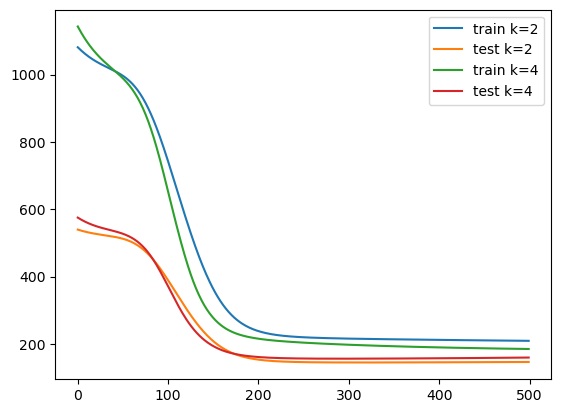

In [56]:
import matplotlib.pyplot as plt


plt.plot(loss1, label='train k=2')
plt.plot(loss2, label='test k=2')
plt.plot(loss3, label='train k=4')
plt.plot(loss4, label='test k=4')
plt.legend()
plt.show()


### Try for a large dataset

In [58]:
#read specific columns from csv

# df = pd.read_csv('ratings.csv', usecols=['userId', 'movieId', 'rating'])

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import torch

#set random seed
np.random.seed(1234)
ratings_data = pd.read_csv('ratings.csv', usecols=['userId', 'movieId', 'rating'], nrows=2880132)

#select random 3000000 rows in ratings_data
#ratings_data=ratings_data.sample(n=3000000, random_state=1)
# ratings_train,ratings_test = train_test_split(ratings_data, test_size = 0.20, random_state = 0)
# movies_data = pd.read_csv("movie.csv", usecols=['movieId'])
# users_no = ratings_data['userId'].unique().shape[0]
# movies_no =movies_data['movieId'].unique().shape[0]

# Atrain, masktrain = matrix(users_no,movies_no,ratings_train,movies_data)
# Atest, masktest = matrix(users_no,movies_no,ratings_test,movies_data)




In [60]:
movies_data = pd.read_csv("movies.csv", usecols=['movieId'])


In [ ]:
from sklearn.model_selection import train_test_split
ratings_train,ratings_test = train_test_split(ratings_data, test_size = 0.20, random_state = 0)


In [ ]:
users_no = ratings_data['userId'].unique().shape[0]
movies_no =movies_data['movieId'].unique().shape[0]

In [ ]:

def matrix(users_no,movie_no,ratings_data,movies_data):
    A = np.full((users_no, movie_no), np.nan)
    for i in range(len(ratings_data)):
        A[int(ratings_data.iloc[i][0]-1)][movies_data[movies_data['movieId'] == ratings_data.iloc[i][1]].index[0]] = ratings_data.iloc[i][2]
    A_tensor = torch.tensor(A)
    mask = ~torch.isnan(A_tensor)
    return A_tensor,mask

Atrain, masktrain = matrix(users_no,movies_no,ratings_train,movies_data)


In [ ]:
Atest, masktest = matrix(users_no,movies_no,ratings_test,movies_data)


In [ ]:
W, H, loss1, loss2 = factorize(Atrain,Atest, masktrain, masktest,  2)


Epoch: 0, loss: 5979.338968, valloss: 2984.149951
Epoch: 1, loss: 5966.459446, valloss: 2978.448140
Epoch: 2, loss: 5953.913122, valloss: 2972.908095
Epoch: 3, loss: 5941.699019, valloss: 2967.528169
Epoch: 4, loss: 5929.814716, valloss: 2962.306157
Epoch: 5, loss: 5918.257228, valloss: 2957.240127
Epoch: 6, loss: 5907.023164, valloss: 2952.328145
Epoch: 7, loss: 5896.108697, valloss: 2947.568109
Epoch: 8, loss: 5885.509525, valloss: 2942.957826
Epoch: 9, loss: 5875.220904, valloss: 2938.494968
Epoch: 10, loss: 5865.237698, valloss: 2934.176987
Epoch: 11, loss: 5855.554446, valloss: 2930.001085
Epoch: 12, loss: 5846.165383, valloss: 2925.964215
Epoch: 13, loss: 5837.064486, valloss: 2922.063114
Epoch: 14, loss: 5828.245499, valloss: 2918.294344


In [ ]:
W, H, loss3, loss4 = factorize(Atrain,Atest, masktrain, masktest,  10)


In [ ]:
import matplotlib.pyplot as plt


plt.plot(loss1, label='train k=10')
plt.plot(loss2, label='test k=10')
plt.plot(loss3, label='train k=30')
plt.plot(loss4, label='test k=30')
plt.legend()
plt.show()